# Python Day 2 

## Goals for Today

There are three main goals for today's lecture:

1. Getting comfortable with making, manipulating, and visualizing NumPy arrays and Pandas data frames.
    - Basic linear algebra operations
2. Building the habit of searching for and reading [code documentation](https://numpy.org/doc/stable/reference/).
3. Breaking down complex programming challenges step-by-step and using pseudo-code.
    - Clean data
    - Characterize data
    - Plot result
    - Test significance of result

## Section 1: Importing Libraries
If vanilla python seems rather lackluster, that's because it is. Fortunately, the python scientific stack adds a broad and powerful array of python packages to fill in the gaps. Once installed, python packages are easily loaded in for use.

In [1]:
import numpy as np
print(np.__version__)

1.17.4


Commands from packages are like attributes of objects. Many libraries also have submodules, or clusters of related functions.

In [2]:
np.linalg
np.random

<module 'numpy.random' from '/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/numpy/random/__init__.py'>

## Section 2: NumPy Array Basics

NumPy arrays have many built-in attributes that make them very convenient to use.

In [4]:
np.random.seed(47404)

## Generate arbitrary array.
x = np.random.randint(0,9,(3,3,2))
x

array([[[0, 2],
        [0, 2],
        [4, 3]],

       [[4, 6],
        [5, 2],
        [8, 3]],

       [[6, 8],
        [7, 1],
        [0, 3]]])

With ipython environments, if you cannot remember the functions available you can make use of **tab-complete**.

In [ ]:
## Try out tab-complete.
x.

The following attributes help you keep track of the most important pieces of metadata.

In [5]:
print(x.shape)    # shape: dimensions of array
print(x.ndim)     # ndim:  number of dimensions of array
print(x.size)     # size:  number of elements in array
print(x.dtype)    # dtype: data type of elements

(3, 3, 2)
3
18
int64


Changing the dtype of an array is easy!

In [6]:
x.astype(int);         # change to int
x.astype(str);         # change to string
x.astype(float);       # change to float (default)
x.astype(np.float16);  # change to float16

Many useful functions are built-in to NumPy arrays.

In [7]:
print('Min:', x.min())      # Get max of array.
print('Max:', x.max())      # Get min of array.
print('Sum:', x.sum())      # Get sum of array.
print('Mean:',x.mean())     # Get mean of array.

Min: 0
Max: 8
Sum: 64
Mean: 3.5555555555555554


One of the most crucial functions is `copy`.

In [8]:
y = x.copy()
x[:] = 0
y

array([[[0, 2],
        [0, 2],
        [4, 3]],

       [[4, 6],
        [5, 2],
        [8, 3]],

       [[6, 8],
        [7, 1],
        [0, 3]]])

### Mini-exercise

a) Look up `np.linspace`. How does it differ from `np.arange`? 

In [10]:
np.arange(1,10,2),np.linspace?

In [11]:
np.arange(1,10,2),np.linspace(0,1,50)

(array([1, 3, 5, 7, 9]),
 array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]))

b) Using `np.linspace`, make an evenly-spaced array, 21 elements long, spanning from -1 to 1. Confirm it's length = 21.

c) Compute the standard deviation of the array. (Hint: this is a built-in attribute.)

In [13]:
np.var?

d) Compute the 40% percentile of the array.

In [14]:
np.percentile?

e) Convert the elements to type `int`. What happens?

## Section 3: Axis Operations

### Built-in operations

In [15]:
np.random.seed(47404)

## Generate arbitrary matrix.
X = np.linspace(0,5,16).reshape(4,4).round(2)
print(X)

[[0.   0.33 0.67 1.  ]
 [1.33 1.67 2.   2.33]
 [2.67 3.   3.33 3.67]
 [4.   4.33 4.67 5.  ]]


Unless otherwise specified, built-in operations will be applied element-wise (e.g. round) or across the entire array.

In [16]:
print( X.sum() )

40.0


However, we can modify along which dimension an operation is applied using the `axis` flag. Below we sum across the first dimension.

In [17]:
## Sum across the first axis.
print( X.sum(axis=0) )

[ 8.    9.33 10.67 12.  ]


Now we sum across the second dimension.

In [18]:
## Sum across the second axis.
print( X.sum(axis=1) )

[ 2.    7.33 12.67 18.  ]


## Section 4: Manipulating Arrays 

### Shaping Arrays

Importantly, all NumPy arrays and matrices have a `reshape` attribute allowing for transforming matrices into different dimensions.

In [20]:
## Make new array.
x = np.arange(24)

## Reshape array.
X = x.reshape(24,1);      # col vector
print(X)
X = x.reshape(1,24);      # row vector
X = x.reshape(6,4);       # 2d array
X = x.reshape(4,3,2);     # 3d array
X

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]]


array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

One nice feature of NumPy is that it allows for intelligent reshaping. If you specify `-1`, it will determine the size of a remaining dimension based on all others.

In [21]:
X = x.reshape(3,-1,2)
print(X.shape)

(3, 4, 2)


In addition to `reshape`, there are a handful of other functions available for manipulating the dimensions of an array.

Transpose, `T`, will flip a matrix along its diagonal 

In [22]:
print(X.shape)
print(X.T.shape)

(3, 4, 2)
(2, 4, 3)


`swapaxes` allows you to reorder two axes of an array.

In [23]:
print(X.shape)
print(X.swapaxes(0,1).shape)

(3, 4, 2)
(4, 3, 2)


`rollaxis` allows you to shift all axes of an array. 

In [24]:
np.rollaxis(X,1).shape

(4, 3, 2)

`flatten` allows you to compress an N-d array to a 1-d array.

In [27]:
X.flatten().shape
X.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

### Joining Arrays

Assuming they have similar shapes & dtypes, NumPy arrays are easily joined. In general, the syntax is to pass a list of arrays to a joining function. 

In [28]:
## Initialize array.
x = np.arange(10).reshape(5,2)
print(x)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


The simplest (silliest) merging approach is to use `np.array` to concatenate two arrays along the first axis. 

In [29]:
## Join arrays.
X = np.array([x,x])
print(X)
print('shape:', X.shape)

[[[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]

 [[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]]
shape: (2, 5, 2)


There are other joining functions, differing in how (along which axis) they merge two arrays. Some examples are below:

In [30]:
## Join along first axis.
X = np.concatenate([x,x])
print(X)
print('shape:', X.shape)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]
 [0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
shape: (10, 2)


In [31]:
## Join along rows (same as vstack).
X = np.row_stack([x,x])
print(X)
print('shape:', X.shape)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]
 [0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
shape: (10, 2)


In [32]:
## Join along columns (same as hstack).
X = np.column_stack([x,x])
print(X)
print('shape:', X.shape)

[[0 1 0 1]
 [2 3 2 3]
 [4 5 4 5]
 [6 7 6 7]
 [8 9 8 9]]
shape: (5, 4)


In [34]:
## Join along specified axis.
X = np.concatenate([x,x], axis=1)
print(X)
print('shape:', X.shape)

[[0 1 0 1]
 [2 3 2 3]
 [4 5 4 5]
 [6 7 6 7]
 [8 9 8 9]]
shape: (5, 4)


In [35]:
## Join along new axis.
X = np.stack([x,x], axis=0)
print(X)
print('shape:', X.shape)

[[[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]

 [[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]]
shape: (2, 5, 2)


### Mini-exercise

a) Using a `np.random` function of your choice, make a new array *A* of shape [2,7,4]. Then complete the following steps:
- Make a copy of *A*. Store the copy in a new variable *B*.
- Swap the first and third axes of *B*.
- Flatten *B* into a 1-d array.
- Reshape *B* back into the original dimensions of *A*.

Now compare A and B. Are they in the same order? 

b) Beginning below with *x*, a random [4,1] array, use various joining functions above until you have *X*, a new matrix of shape [12,3]. The order of the elements of *X* don't matter.

In [ ]:
x = np.random.uniform(size=(4,1))

c) *Y* is a new random variable of shape [1,12,7,3]. Reshape *Y* until you can subtract *X* from it. In other words, reshape this new variable until you can execute: ```Y - X```.

In [ ]:
Y = np.random.normal(size=(1,12,7,3))

## Section 5: Indexing, Masking, and Assignments

NumPy supports a great many ways of indexing.

In [36]:
np.random.seed(47404)

## Construct an arbitrary matrix.
X = np.random.randint(0, 10, (6,6))
print(X)

[[9 0 2 0 2 4]
 [3 4 6 5 2 9]
 [8 3 9 6 8 7]
 [1 0 3 3 6 7]
 [1 3 3 3 8 3]
 [5 1 7 0 7 0]]


In [38]:
## Access particular rows.
X[1:2]

array([[3, 4, 6, 5, 2, 9]])

In [39]:
## Access particular columns.
X[:,:5]

array([[9, 0, 2, 0, 2],
       [3, 4, 6, 5, 2],
       [8, 3, 9, 6, 8],
       [1, 0, 3, 3, 6],
       [1, 3, 3, 3, 8],
       [5, 1, 7, 0, 7]])

In [40]:
## Access particular rows/columns.
X[:5,5:]

array([[4],
       [9],
       [7],
       [7],
       [3]])

In [41]:
## Access using lists of indexes.
X[[1,3,5],[5,1,2]]

array([9, 0, 7])

Far more useful is indexing with boolean arrays.

In [42]:
## Return all elements of matrix that meet criterion.
X[X > 5]

array([9, 6, 9, 8, 9, 6, 8, 7, 6, 7, 8, 7, 7])

In [43]:
## Return all rows that begin with particular integer.
X[X[:,0] == 1]

array([[1, 0, 3, 3, 6, 7],
       [1, 3, 3, 3, 8, 3]])

In [ ]:
## Return all columns whose sum is greater than 40.
X[:,X.sum(axis=0) > 20]

For larger matrices, we can use the ellipsis as a shorthand.

In [ ]:
Y = np.random.randint(0,9,(5,5,5,5))
Y[0,...,-1]

We can update NumPy arrays in place.

In [ ]:
## Update first element.
X[0,0] = 55
print(X)

In [ ]:
## Update full row.
X[3,:] = 66
print(X)

In [ ]:
## Update multiple columns.
X[:,-2:] = 77
print(X)

This also allows for convenient masking.

In [ ]:
X[X==5] = 88
print(X)

For a complete list of convenient routines, see the [NumPy indexing documentation](https://docs.scipy.org/doc/numpy/user/basics.indexing.html#).

`np.where` will also return indices

In [ ]:
np.random.seed(47404)

## Construct an arbitrary array.
X = np.random.randint(0, 10, (5,3))

print(X)
print(np.where(X > 5))

What if we want to find elements that match multiple criteria?

The `logical_and` function allows us to find elements where two conditions are met.

In [ ]:
np.logical_and(X > 5, X % 2)

The syntax for two or more conjuctive arguments is:

In [44]:
(X > 5) & (X % 5)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

Similarly, `logical_or` allows us to find elements where one of two conditions are met.

In [ ]:
X[np.logical_or(X < 2, X > 8)]

The syntax for two or more disjunctive arguments is:

In [45]:
(X < 2) | (X > 8)

array([[ True,  True, False,  True, False, False],
       [False, False, False, False, False,  True],
       [False, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [ True, False, False, False, False, False],
       [False,  True, False,  True, False,  True]])

NumPy includes a number of very helpful functions that allow you to apply a Python function conveniently along parts of an array without Python `for` loops (np.apply_along_axis, np.apply_over_axes). We will illustrate with a simple example of standard-scoring (z-scoring) a matrix.

`np.where()` is another function that facilitates masking or selection based on satisfaction of a boolean condition.

In [ ]:
## Define the standard score (z-score) function.
def zscore(arr): 
    return (arr - arr.mean()) / arr.std()

## Define a simple matrix.
mat = np.arange(12).reshape(2,6)
print(mat)

In [ ]:
zmat = np.apply_along_axis(zscore, axis=1, arr=mat).round(2)
print(zmat)
print(zscore(mat))

In [ ]:
NumPy includes a number of very helpful functions that allow you to apply a Python function conveniently along parts of an array without Python `for` loops (np.apply_along_axis, np.apply_over_axes). We will illustrate with a simple example of standard-scoring (z-scoring) a matrix.

`np.where()` is another function that facilitates masking or selection based on satisfaction of a boolean condition.

## Define the standard score (z-score) function.
def zscore(arr): 
    return (arr - arr.mean()) / arr.std()

## Define a simple matrix.
mat = np.arange(12).reshape(2,6)
print(mat)

zmat = np.apply_along_axis(zscore, axis=1, arr=mat).round(2)
print(zmat)
print(zscore(mat))

## Section 6: Linear algebra basics in NumPy

This section is meant to prepare you for the rest of bootcamp. Here are some basic definitions and pieces of syntax that will form the building blocks for topics to come.

The foundation of linear algebra is the **vector**, say vector $x$. That vector can be represented as an array in np.

In [46]:
x=np.random.random(2)
x

array([0.06918023, 0.65229307])

The length of a vector is called its **norm**.

Formally (but don't worry about this) a norm is a function p: V → R s.t. V is a Vector Space, with the following properties: 
- For all a ∈ F and all u, v ∈ V, p(av) = |a| p(v), (positive homogeneity or positive scalability). 
- p(u + v) ≤ p(u) + p(v) (triangle inequality or subadditivity).
- If p(v) = 0 then v is the zero vector (separates points).


In [47]:
x_norm=np.linalg.norm(x)
x_norm

0.6559513311621117

A **unit vector** is a vector with magnitude 1; every vector other than a 0 vector can be scaled to unit length. How so?

In [52]:
# find a unit vector in the same direction as x
x
x_unit=x/np.linalg.norm(x)
np.linalg.norm(x_unit)

0.9999999999999999

In [53]:
z=np.array([0,10])

The dot product between vectors $x$ and $z$ is 
\begin{align}
x \cdot z &= \sum_{i=1}^m x_iz_i \\
\end{align}

In [54]:
print(x@z) # native syntax
print(np.dot(x,z)) # numpy syntax 
print(sum(x*z)) # confirmation

6.522930666647292
6.522930666647292
6.522930666647292


The same operation can be made on **matrices**, where the elements of each row of the first matrix are multiplied by the corresponding column of the second. This operation is only possible when the number of rows in the first is the same as the number of columns in the second matrix. This operation is also known as the **inner product**.

In [55]:
x_stacked=np.stack([x]*3)
z_stacked=np.stack([z]*4)
z_stacked

array([[ 0, 10],
       [ 0, 10],
       [ 0, 10],
       [ 0, 10]])

In [56]:
x_stacked, z_stacked

(array([[0.06918023, 0.65229307],
        [0.06918023, 0.65229307],
        [0.06918023, 0.65229307]]),
 array([[ 0, 10],
        [ 0, 10],
        [ 0, 10],
        [ 0, 10]]))

Which dimensions of x_stacked and z_stacked agree? We can rotate one of them so that the number of rows agrees with the number of colmns of the other. The rotation is known as the **transpose**, where the matrix is flipped over its diagonals (columns become rows, rows become columns).

In [57]:
x_stacked.T

array([[0.06918023, 0.06918023, 0.06918023],
       [0.65229307, 0.65229307, 0.65229307]])

What will happen below?

In [58]:
x_stacked @ z_stacked

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

What about here?

In [59]:
x_stacked.T @ z_stacked

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

And here?

In [62]:
x_stacked @ z_stacked.T
x_stacked.shape,z_stacked.T.shape
x_stacked

array([[0.06918023, 0.65229307],
       [0.06918023, 0.65229307],
       [0.06918023, 0.65229307]])

## Section 7: Introduction to Pandas

While Numpy is designed to do fast vectorized calculations with little dependency on external packages. But suppose you have (as in common in research) tabular data consisting of a mix of different types. Basic Numpy is not equipped to handle this in a nice user-friendly

What you really want is a spreadsheet, but ideally one that can live inside Python and that also allows fast math as Numpy does.

That, in essence, is what Pandas is -- a Python-text-command-driven version of Excel, but more flexible and powerful, with Numpy arrays undergirding the whole thing. 

Pandas introduces two core data structures -- the Pandas Series and the Pandas DataFrame -- that, while built on top of Numpy arrays, offer some extra functionality that arrays just don't have out of the box.

## Pandas DataFrames

The DataFrame is the core dta analysis object of Pandas. It is very similar to the DataFrame in R. It's essentially a bunch of Series objects glued together into columns, all of which share a common set of indexes.  Unlike a 2D Numpy array, the dtypes of the constituent Series objects can all be different (but *within* a Series, the dtype must be uniform, since that's really a 1D array under the hood).

In [63]:
from pandas import DataFrame
DataFrame?
import pandas as pd

### Generating DataFrames

A DataFrame can be generated directly from:

* A dict of arrays/lists/Series/other dicts
* A 2D array
* The Numpy "structured array" we mentioned up top (beyond our scope)
* A single Series (if you want a single-column DataFrame)
* Another DataFrame
* A file of data (e.g. a csv)

Indexes are specified with the `index` keyword (these will label rows), and column labels with the `columns` keyword.

Let's see how some of these work (it works very similarly to how Series are generated)...

In [ ]:
# From a dictionary of array-like stuff
mydict = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
          'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

# The dictionary keys become columns.
print(pd.DataFrame(mydict))

# You can override this with the "columns" keyword, but watch out!  -- unless your specified columns overlap with the
# keys, you will get an empty DataFrame
print("\nThis will be empty...\n")
print(pd.DataFrame(mydict, columns=['width','length']))
print("\n...but this will not be\n")
print(pd.DataFrame(mydict, columns=['two', 'width']))
print("\n...and neither will this\n")
print(pd.DataFrame(mydict, columns=['two', 'width', 'one']))

# Notice how the index & column behavior with NaN works analogously to what we saw for Series.

# We can add an "index" keyword for the whole DataFrame, and that will supersede the individual Series ones,
# with the same sort of NaN behavior

print(pd.DataFrame(mydict, index=['b', 'd', 'a']))
print("\nand\n")
print(pd.DataFrame(mydict, index=['b', 'd', 'a'], columns=['two', 'width', 'one']))

print("\nand\n")
print(pd.DataFrame(mydict, index=['b', 'd', 'a'], columns=['length', 'width']))

# Getting how this works?

Most importantly, DataFrames can be generated by reading in CSV/Excel files. Here we read in a CSV of choice behavior data from [Tom et al. (2007)](https://www.ncbi.nlm.nih.gov/pubmed/17255512) [data available [here](https://openneuro.org/datasets/ds000005/versions/00001)]. Briefly, this dataset is comprised of the behavior gathered from 16 participants who completed a gambling task (three sessions each).


In [64]:
## Load data from CSV.
data = pd.read_csv('gambles.csv')

data.head(5)

,Subject,Run,Gain,Loss,Choice,RT
0,1,1,10,6,0.0,1.137
1,1,1,10,7,1.0,1.320
2,1,1,10,11,0.0,1.806
3,1,1,10,12,0.0,1.383
4,1,1,10,15,0.0,1.637


In [65]:
print(data.shape)
print(data.size)
print(data.index)
print(data.columns)

(4096, 6)
24576
RangeIndex(start=0, stop=4096, step=1)
Index(['Subject', 'Run', 'Gain', 'Loss', 'Choice', 'RT'], dtype='object')


DataFrames support all of the core operations that NumPy arrays do. However, DataFrames do so in an organized fashion for easy describing of data.  Try running each of the commands below (which work just as they do for Numpy arrays):

```python
data.round();
data.sum();
data.max();
data.min();
data.mean();
data.std();
data.median()

```

In [66]:
data.describe()

,Subject,Run,Gain,Loss,Choice,RT
count,4096.000000,4096.000000,4096.00000,4096.000000,3942.000000,3942.000000
mean,8.500000,1.996094,25.00000,12.500000,0.513952,1.446901
std,4.610335,0.817384,9.22067,4.610335,0.499869,0.498300
min,1.000000,1.000000,10.00000,5.000000,0.000000,0.001000
25%,4.750000,1.000000,17.50000,8.750000,0.000000,1.095250
50%,8.500000,2.000000,25.00000,12.500000,1.000000,1.352500
75%,12.250000,3.000000,32.50000,16.250000,1.000000,1.727000
max,16.000000,3.000000,40.00000,20.000000,1.000000,5.487000


In [67]:
## Add column denoting rows with missing data.
data['Missing'] = data.Choice.isnull().astype(int)

data.head(5)

,Subject,Run,Gain,Loss,Choice,RT,Missing
0,1,1,10,6,0.0,1.137,0
1,1,1,10,7,1.0,1.320,0
2,1,1,10,11,0.0,1.806,0
3,1,1,10,12,0.0,1.383,0
4,1,1,10,15,0.0,1.637,0


Similarly, it is easy to drop rows with missing data.

In [68]:
## Check original shape.
print(f'Original shape: {data.shape}')

## Drop missing data.
data = data.dropna()

## Check new shape.
print(f'Original shape: {data.shape}')

Original shape: (4096, 7)
Original shape: (3942, 7)


Particular columns can also be dropped.

In [69]:
## Drop missing data column.
data = data.drop(['Missing'], axis=1)

DataFrames are easily converted back to NumPy arrays and dictionaries.

In [70]:
## To NumPy array.
arr = data.values

## To dictionary.
dd = data.to_dict()

DataFrames can also be easily written to file.

In [ ]:
data.to_csv?

## Section 8: Visualization w/ Matplotlib and Seaborn

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline 

## NOTE: The second line is a bit of notebook magic! 
## It's a jupyter-notebook shortcut that makes all
## plots be displayed at the bottom of a cell.

### Basic Example
Lineplots are the most intuitive Matplotlib plot, requiring at the minimum only the x- and y-datapoints. Many embellishments can be added. 

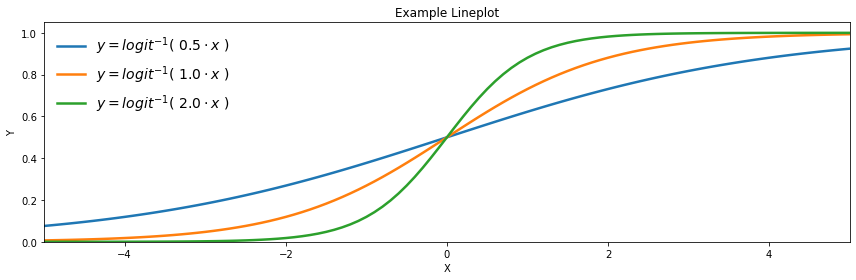

In [73]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Define sigmoid function.
def inv_logit(arr):
    return 1. / (1 + np.exp(-arr))

## Simulate data.
x = np.linspace(-5,5,101)


## Plot lines.
for b in [0.5,1.0,2.0]:
    y = inv_logit(x * b)
    ax.plot(x, y, lw=2.5, label=r'$y = logit^{-1}( \ %0.1f \cdot x \ )$' %b)

## Add details.
ax.set(xlim=(x.min(), x.max()), xlabel='X', ylim=(0), ylabel='Y', title='Example Lineplot')
ax.legend(loc=2, frameon=False, fontsize=14)

plt.tight_layout()

The Seaborn statistical data visualization library was created to be the equivalent of ggplot2 for python. In other words, it is designed to rapidly turn around publication-ready plots from Pandas DataFrames with as minimal code as necessary. The [documention](https://seaborn.pydata.org/) is full of great examples that should be checked out. We will go through a few examples here.

In [74]:
import seaborn as sns

### Style and Context
One of the great things about Seaborn is setting defaults. The defaults set a variety of parameters (e.g. colors, fonts, font sizes, etc.) that result in little tweaking of figures down the line. We introduce those two functions here.

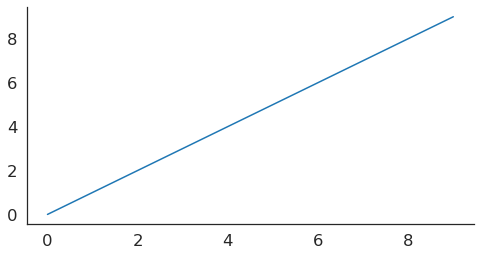

In [75]:
## set_style sets the aesthetic style of the plots. This most dramatically 
## affects the background of plots and the presence (or absence) of gridlines.
sns.set_style('white')      # {white, whitegrid, dark, darkgrid}

## set_context sets the context parameters, affecting the size of labels,
## lines, and other elements of the plot.
sns.set_context('notebook', font_scale=1.5) # {notebook, paper, talk, poster}

## Text plot.
fig = plt.figure(figsize=(8,4))
plt.plot(np.arange(10), np.arange(10));

sns.despine()

### Barplots
Let's first start by recreating the barplot from earlier (i.e. average response within subjects). As can be seen, substantially fewer lines of code are necessary. Moreover, 95% CIs are computed via bootstrap resampling.

In [76]:
data.head()

,Subject,Run,Gain,Loss,Choice,RT
0,1,1,10,6,0.0,1.137
1,1,1,10,7,1.0,1.320
2,1,1,10,11,0.0,1.806
3,1,1,10,12,0.0,1.383
4,1,1,10,15,0.0,1.637


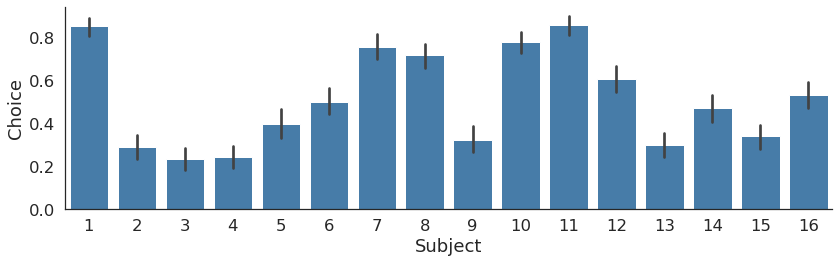

In [77]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot barplot.
sns.barplot('Subject', 'Choice', data=data, color='#377eb8', ax=ax)

sns.despine()
plt.tight_layout()

### Pointplots / Lineplots

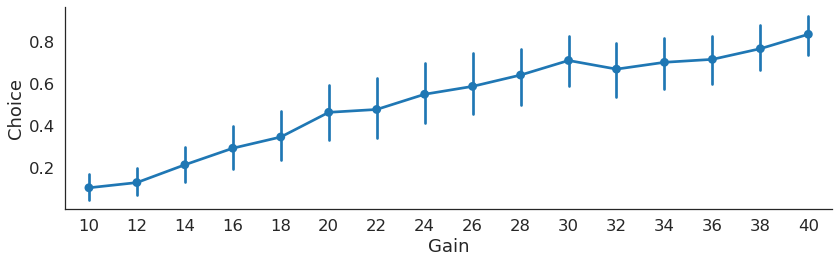

In [78]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## GroupBy subject/gain.
gb = data.groupby(['Subject','Gain']).Choice.mean().reset_index()

## Plot pointplot.
sns.pointplot('Gain', 'Choice', data=gb, ax=ax)

sns.despine()
plt.tight_layout()

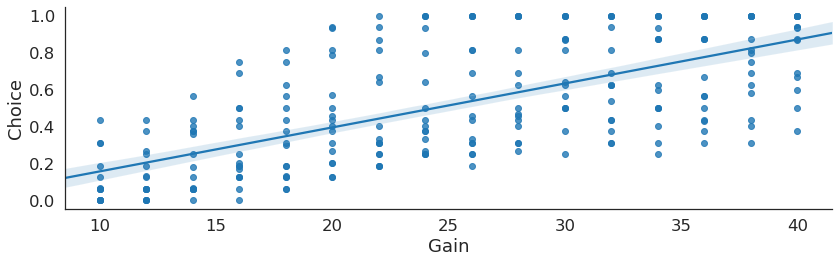

In [79]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## GroupBy subject/gain.
gb = data.groupby(['Subject','Gain']).Choice.mean().reset_index()

## Plot regression.
sns.regplot('Gain', 'Choice', data=gb, ax=ax)

sns.despine()
plt.tight_layout()

### Distribution Plots

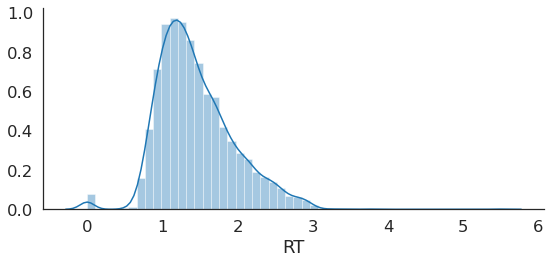

In [80]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Plot distribution.
sns.distplot(data.RT, ax=ax)

sns.despine()
plt.tight_layout()

### Heatmaps

Loss,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gain,,,,,,,,,,,,,,,,
10,0.562500,0.200000,0.200000,0.187500,0.187500,0.125000,0.062500,0.062500,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.062500,0.000000
12,0.733333,0.466667,0.312500,0.312500,0.142857,0.125000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,0.733333,0.466667,0.600000,0.533333,0.437500,0.187500,0.200000,0.133333,0.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,0.933333,0.625000,0.687500,0.625000,0.375000,0.400000,0.312500,0.250000,0.133333,0.187500,0.133333,0.062500,0.000000,0.000000,0.000000,0.000000
18,0.933333,0.800000,0.600000,0.666667,0.562500,0.375000,0.312500,0.333333,0.187500,0.266667,0.125000,0.125000,0.133333,0.187500,0.000000,0.062500
20,0.923077,0.933333,0.866667,0.875000,0.812500,0.437500,0.375000,0.437500,0.400000,0.266667,0.181818,0.266667,0.250000,0.142857,0.133333,0.062500
22,1.000000,0.812500,0.933333,0.875000,0.600000,0.466667,0.375000,0.500000,0.375000,0.333333,0.214286,0.312500,0.333333,0.142857,0.187500,0.125000
24,1.000000,0.937500,0.933333,0.875000,0.866667,0.500000,0.533333,0.466667,0.500000,0.400000,0.437500,0.266667,0.285714,0.285714,0.214286,0.142857
26,1.000000,1.000000,0.937500,0.937500,0.800000,0.500000,0.562500,0.500000,0.571429,0.400000,0.466667,0.333333,0.466667,0.437500,0.250000,0.250000


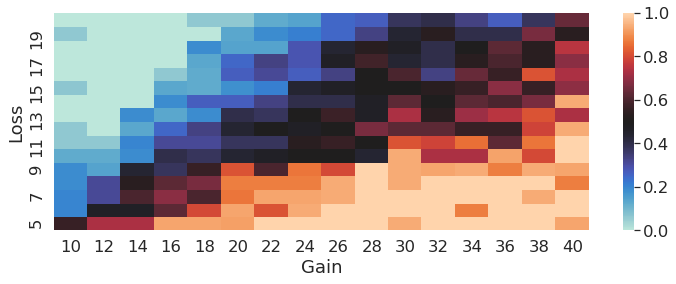

In [82]:
## Initialize figure.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Compute pivot table.
table = data.pivot_table(index='Gain', columns='Loss', values='Choice')
table
## Plot heatmap.
sns.heatmap(table.T, vmin=0, vmax=1, center=0.5, ax=ax)
ax.invert_yaxis()
table

### FacetGrid

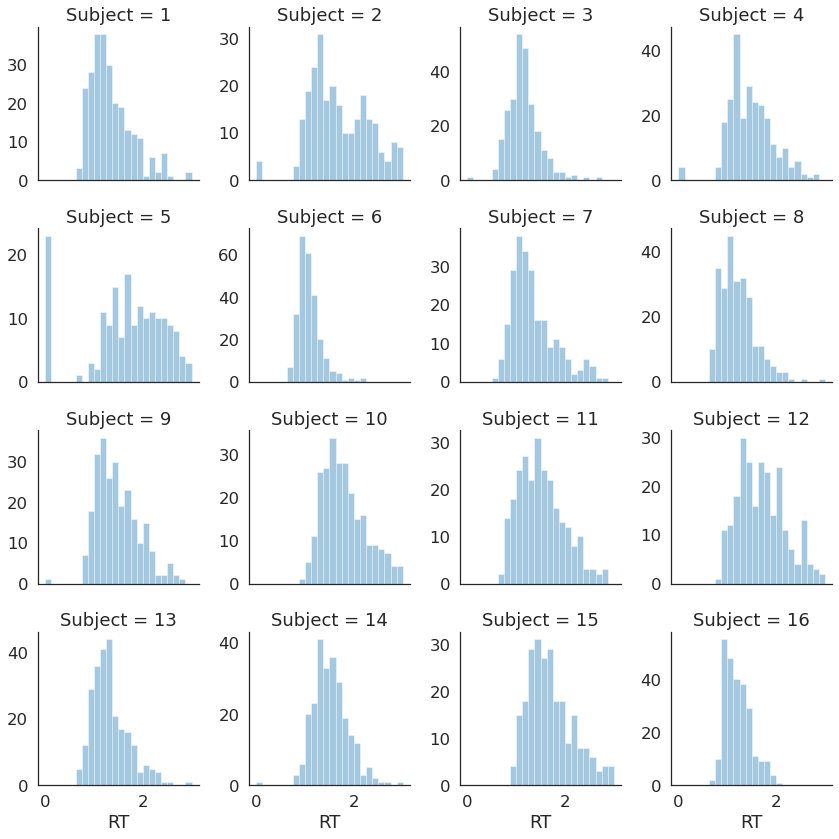

In [83]:
## Initialize canvas.
g = sns.FacetGrid(data, col='Subject', col_wrap=4, sharex=True, sharey=False)

## Plot histograms.
g.map(sns.distplot, 'RT', bins=np.linspace(0,3,25), kde=False);

# Section 3: Introduction to Statistics (SciPy + Statsmodels)

## SciPy Statistics Module
SciPy introduces a series of special modules for different computations, including: integration, optimization, signal and image processing, and statistics. The [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/) details the many powerful tools the package introduces.

The [SciPy stats module](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) (scipy.stats) introduces a number of helpful functions, including:
* Statistical distributions (e.g. normal, student-t, inv-normal, gamma, beta, binomal..., [full list](https://docs.scipy.org/doc/scipy/reference/stats.html))
* Measures of distributional shape (e.g. kurtosis, skew, QQ-plots, KS-test)
* Basic statistical tests (e.g. linear correlation, nonparametric correlation, t-tests, one-way ANOVA, Chi-Square)

The SciPy package can be especially helpful when the user needs to compute quick statistics without necessarily needing to implement even simple models. 


### Basic Statistics
SciPy also has implemented several basic statistical functions for quickly computing statistics:
* Correlations: Pearson correlation (``pearsonr``), Spearman correlation (``spearmanr``), Kendall Tau (``kendalltau``)
* T-tests: one-sample t-test (``ttest_1samp``), two-sample t-test (``ttest_ind``), dependent sample t-test (``ttest_rel``)
* ANOVA: One-way ANOVA (``f_oneway``)
* Chi-square (``chisquare``, ``chi2_contingency``)

We will quickly highlight a few of these functions.

In [86]:
from scipy.stats import pearsonr, ttest_ind
np.random.seed(47404)

## Simulate data from multivariate normal distribution.
## The two variables will be of different mean and r=0.4 correlated.

## Define means / covariances.
mu = [0,2]
cov = [[1.0, 0.4],
       [0.4, 1.0]]

## Randomly sample 50 observations.
x, y = np.random.multivariate_normal(mu, cov, 50).T

## Compute correlation of pairs: (1,2), (1,3)
print('Pearson: r = %0.3f, p = %0.3f' %pearsonr(x, y))

## Compute independent t-tests
print('Independent t-test: t = %0.3f, p = %0.20f' %ttest_ind(x, y))

Pearson: r = 0.461, p = 0.001
Independent t-test: t = -8.558, p = 0.00000000000016117682


## Statsmodels
Statsmodels is the prominent statistical models package in the scientific python distribution. Statsmodels provides functionality for linear regression, generalized linear models, limited dependent variable models, ARMA and VAR models. The [Statsmodels documentation](http://www.statsmodels.org/stable/index.html) provides a full list of models and functions implemented. It draws its inspiration from the most popular R statistics packages (e.g. lme4) and uses the same statistical modeling syntax as R (e.g. "y ~ x"). As we will see, the package is still new and relatively limited as of the time of writing. Though the most basic models are implemented, more complex yet standard models (e.g. mixed-effects logistic regression) are not yet implemented. 


If you are familiar with R-styled formulas for regression, then Statsmodels + Pandas is a very powerful combo of packages for data analysis in python. We will cover only a few select examples, but know that many models are already implemented (e.g. OLS, GLM, GEE, WLS). Many more well-documented tutorials can be found [here](http://www.statsmodels.org/stable/examples/index.html#notebook-examples) and [here](https://github.com/statsmodels/statsmodels/wiki/Examples). 

### Linear Regression (OLS)
Below is a basic ordinary least squares (OLS) linear regression model measuring the relationship of subjective likelihood-of-take (respnum) against gain and loss.

In [87]:
from statsmodels.api import OLS

## Define formula.
formula = 'RT ~ Gain + Loss'

## Define model.
model = OLS.from_formula(formula, data=data)

## Fit model.
result = model.fit()

## Print summary.
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.002    
Dependent Variable: RT               AIC:                5690.9105
Date:               2021-08-04 13:12 BIC:                5709.7488
No. Observations:   3942             Log-Likelihood:     -2842.5  
Df Model:           2                F-statistic:        4.694    
Df Residuals:       3939             Prob (F-statistic): 0.00920  
R-squared:          0.002            Scale:              0.24784  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    1.3695     0.0314   43.5673   0.0000    1.3078   1.4311
Gain         0.0005     0.0009    0.6019   0.5473   -0.0012   0.0022
Loss         0.0052     0.0017    3.0082   0.0026    0.0018   0.0085
------------------------------------------------------------------
Omnibus:             457.221       Durbin-Watson:          1.418  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       848.861
Skew:                0.760         Prob(JB):               0.000  
Kurtosis:            4.691         Condition No.:          116    
==================================================================

"""